In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew

In [3]:
data = pd.read_excel('Salary Data 2.xlsx')

In [4]:
print("Initial Data:")
print(data.head())

Initial Data:
    Age  Gender Education Level          Job Title              Industry  \
0  32.0    Male      Bachelor's  Software Engineer  Software Engineering   
1  28.0  Female        Master's       Data Analyst             Computing   
2  45.0    Male             PhD     Senior Manager              Business   
3  36.0  Female      Bachelor's    Sales Associate              Business   
4  52.0    Male        Master's           Director            Mass Media   

   Years of Experience    Salary Category  
0                  5.0   5111.10      M40  
1                  3.0   3691.35      B40  
2                 15.0   8518.50      M40  
3                  7.0   3407.40      B40  
4                 20.0  11358.00      T20  


In [5]:
print("\n Data Type:")
print(data.dtypes)


 Data Type:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Industry                object
Years of Experience    float64
Salary                 float64
Category                object
dtype: object


In [6]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Industry               0
Years of Experience    2
Salary                 0
Category               0
dtype: int64


In [7]:
data_cleaned = data.dropna()
print("\nMissing Values:")
print(data_cleaned.isnull().sum())


Missing Values:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Industry               0
Years of Experience    0
Salary                 0
Category               0
dtype: int64


In [8]:
# Ensure appropriate data types
data_cleaned.loc[:,'Age'] = data_cleaned['Age'].astype(int)
data_cleaned.loc[:,'Years of Experience'] = data_cleaned['Years of Experience'].astype(float)
data_cleaned.loc[:, 'Salary'] = data_cleaned['Salary'].astype(float)


In [9]:
print("\n Data Type:")
print(data_cleaned.dtypes)


 Data Type:
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Industry                object
Years of Experience    float64
Salary                 float64
Category                object
dtype: object


In [10]:
data_cleaned.loc[:, 'Job Title'] = data_cleaned['Job Title'].str.lower()
data_cleaned.loc[:, 'Gender'] = data_cleaned['Gender'].str.lower()
data_cleaned.loc[:, 'Education Level'] = data_cleaned['Education Level'].str.lower()
data_cleaned.loc[:, 'Industry'] = data_cleaned['Industry'].str.lower()
data_cleaned.loc[:, 'Category'] = data_cleaned['Category'].str.lower()

In [11]:
# Combine categories
data_cleaned.loc[:, 'Education Level'] = data_cleaned['Education Level'].replace({
    "bachelor's degree": "bachelor's"
})
data_cleaned.loc[:, 'Education Level'] = data_cleaned['Education Level'].replace({
    "master's degree": "master's"
})

In [12]:
job_roles = data_cleaned['Job Title'].unique().tolist()
print("\nList of Job Roles:")
print(job_roles)



List of Job Roles:
['software engineer', 'data analyst', 'senior manager', 'sales associate', 'director', 'marketing analyst', 'product manager', 'sales manager', 'marketing coordinator', 'senior scientist', 'software developer', 'hr manager', 'financial analyst', 'project manager', 'customer service rep', 'operations manager', 'marketing manager', 'senior engineer', 'data entry clerk', 'sales director', 'business analyst', 'vp of operations', 'it support', 'recruiter', 'financial manager', 'social media specialist', 'software manager', 'junior developer', 'senior consultant', 'product designer', 'ceo', 'accountant', 'data scientist', 'marketing specialist', 'technical writer', 'hr generalist', 'project engineer', 'customer success rep', 'sales executive', 'ux designer', 'operations director', 'network engineer', 'administrative assistant', 'strategy consultant', 'copywriter', 'account manager', 'director of marketing', 'help desk analyst', 'customer service manager', 'business intell

In [13]:
salary_skewness = skew(data_cleaned['Salary'])
print(f'Skewness of Salary: {salary_skewness}')


Skewness of Salary: -0.43709480394875655


In [14]:
Q1 = data_cleaned['Salary'].quantile(0.25)
Q3 = data_cleaned['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_cleaned[(data_cleaned['Salary'] < lower_bound) | (data_cleaned['Salary'] > upper_bound)]
print(f'Number of Outliers in Salary: {outliers.shape[0]}')

Number of Outliers in Salary: 0


In [15]:
# Display summary statistics for numerical columns
print("Summary Statistics:")
print(data_cleaned.describe())

Summary Statistics:
              Age  Years of Experience        Salary
count  998.000000           998.000000    998.000000
mean    32.130261             7.230962   7676.400467
std      6.439212             5.160903   2729.999857
min     23.000000             0.000000     19.876500
25%     28.000000             3.000000   5679.000000
50%     31.000000             6.000000   7950.600000
75%     34.000000             9.000000  10222.200000
max     53.000000            25.000000  14197.500000


Job Title
data analyst                209
software engineer           174
data scientist              133
product manager             115
director of marketing        12
director of operations       11
senior business analyst      10
senior marketing manager      9
senior marketing analyst      9
junior business analyst       8
Name: count, dtype: int64


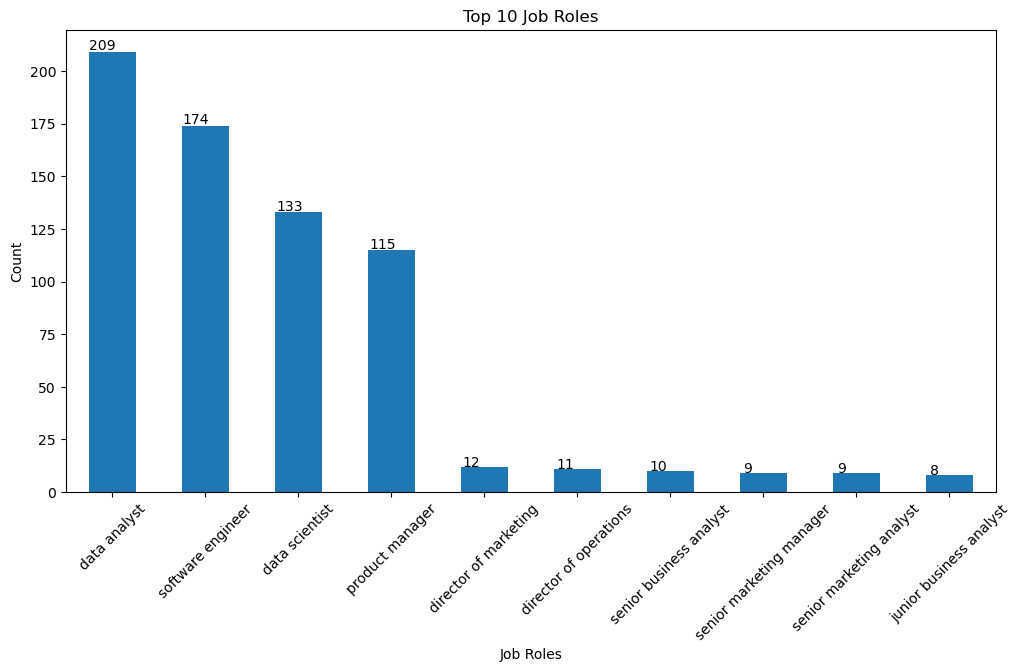

In [16]:
# Find the top 10 job roles
top_job_roles = data_cleaned['Job Title'].value_counts().head(10)

# Display the top 10 job roles
print(top_job_roles)

# Plot the top 10 job roles
plt.figure(figsize=(12, 6))
ax = top_job_roles.plot(kind='bar')
plt.title('Top 10 Job Roles')
plt.xlabel('Job Roles')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


C:\Users\LQC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


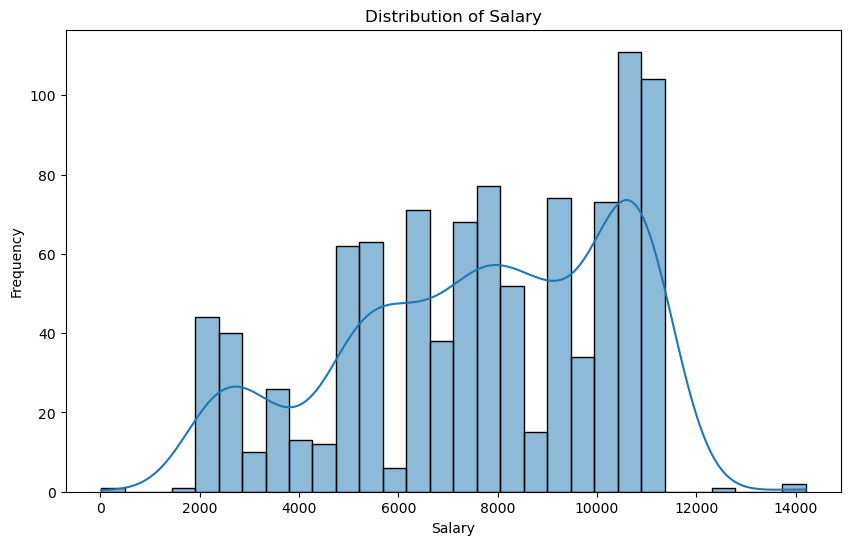

In [17]:
# Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Salary'], kde=True, bins=30)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

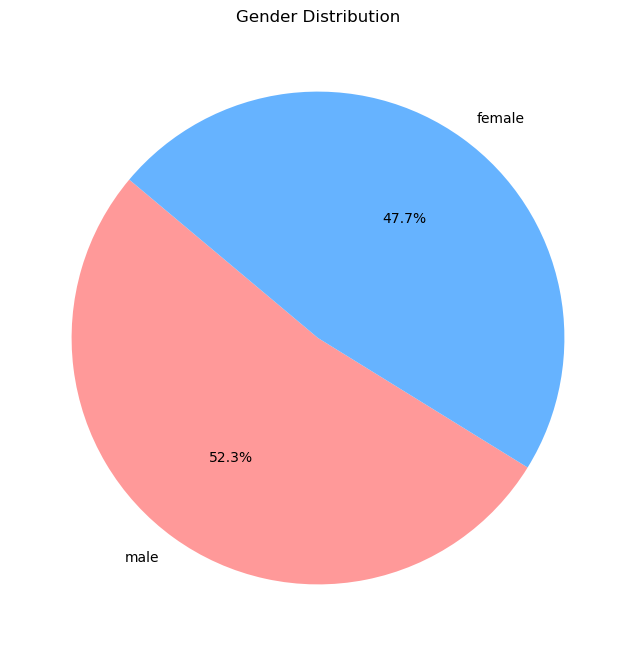

In [18]:
gender_counts = data_cleaned['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

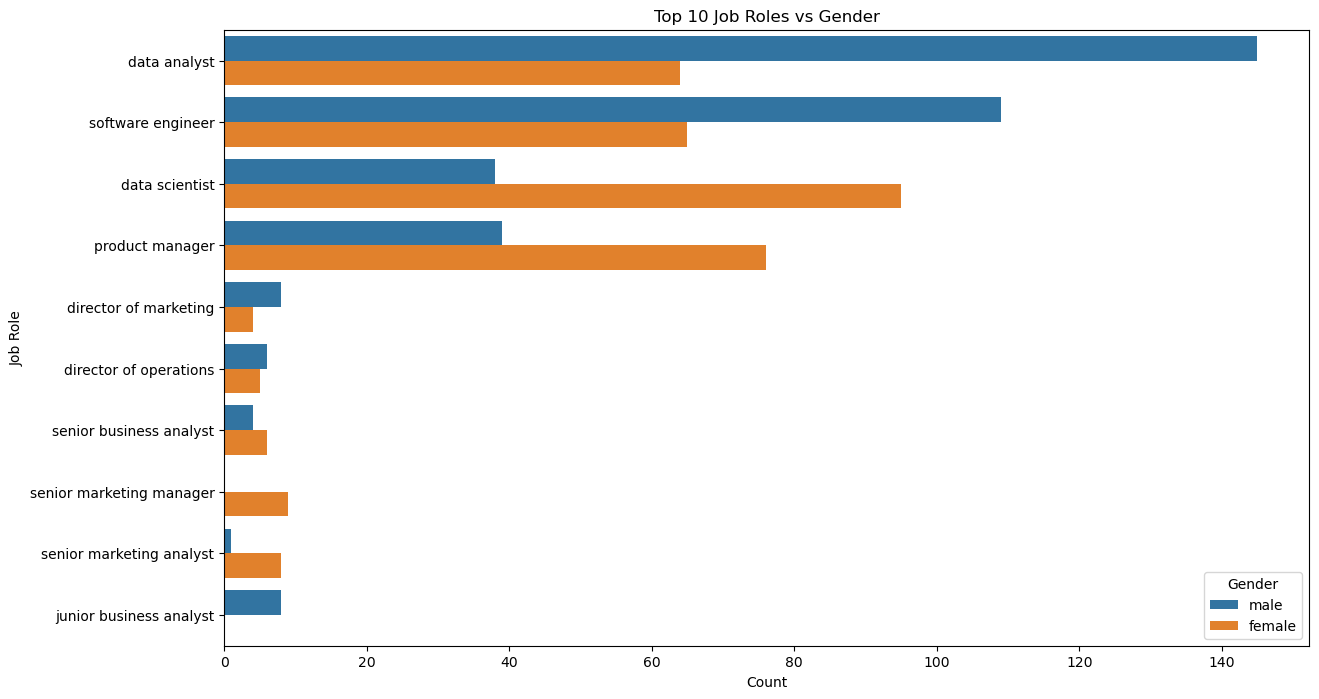

In [19]:
# Job Roles vs Gender Count Plot
# Find the top 10 job roles
top_job_roles = data_cleaned['Job Title'].value_counts().head(10).index

# Filter the dataset to include only the top 10 job roles
top_job_roles_data = data_cleaned[data_cleaned['Job Title'].isin(top_job_roles)]

# Job Roles vs Gender Count Plot
plt.figure(figsize=(14, 8))
sns.countplot(y='Job Title', hue='Gender', data=top_job_roles_data, order=top_job_roles)
plt.title('Top 10 Job Roles vs Gender')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.legend(title='Gender')
plt.show()

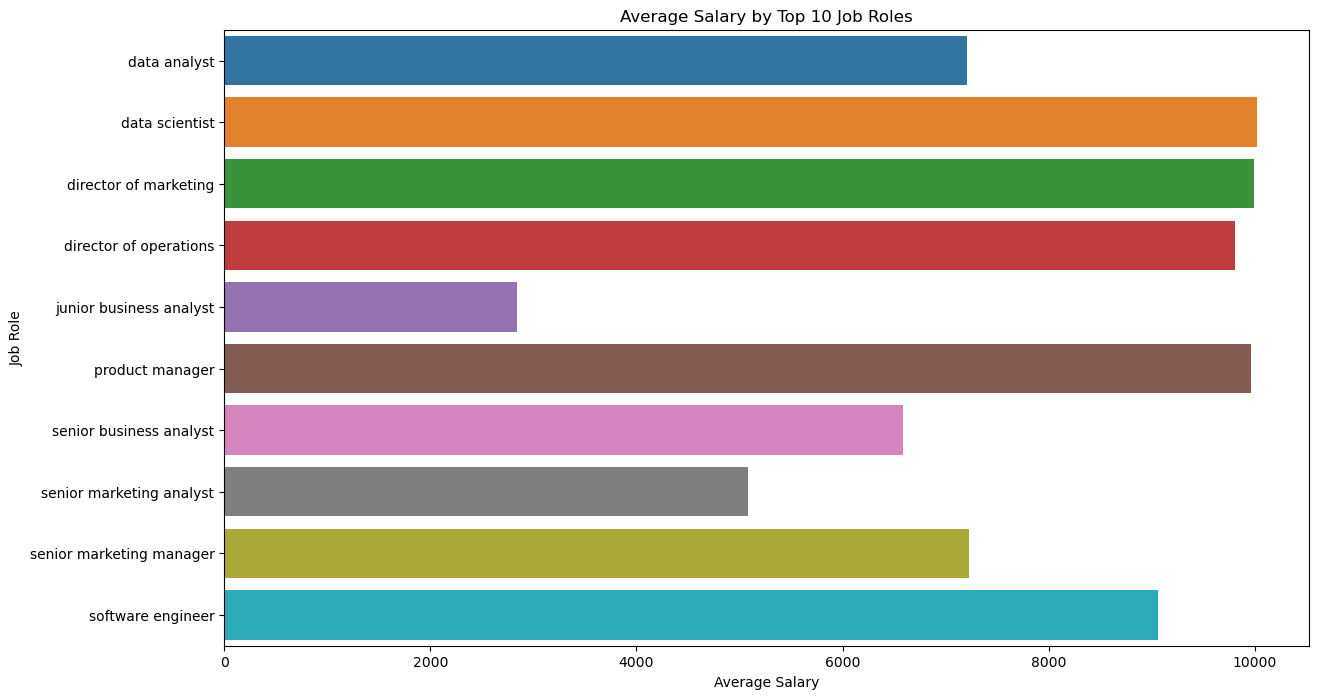

In [20]:
# Salary vs Job Roles Bar Chart (TOP 10 HIGHEST Count)

# Find the top 10 job roles by count
top_10_job_roles = data_cleaned['Job Title'].value_counts().head(10).index

# Filter the dataset to include only the top 10 job roles
top_10_job_roles_data = data_cleaned[data_cleaned['Job Title'].isin(top_10_job_roles)]

# Calculate the mean salary for the top 10 job roles
mean_salary_by_top_10_job = top_10_job_roles_data.groupby('Job Title')['Salary'].mean()

# Salary vs Job Roles Bar Chart
plt.figure(figsize=(14, 8))
sns.barplot(x=mean_salary_by_top_10_job, y=mean_salary_by_top_10_job.index)
plt.title('Average Salary by Top 10 Job Roles')
plt.xlabel('Average Salary')
plt.ylabel('Job Role')
plt.show()

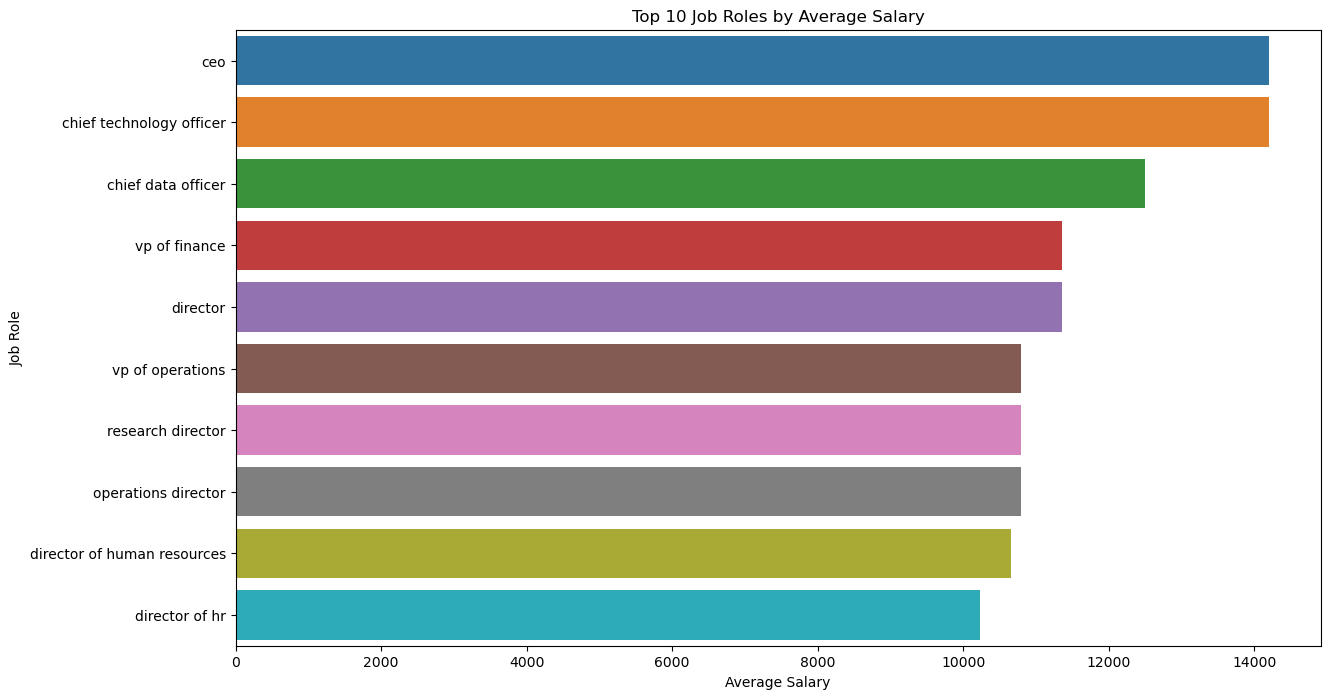

In [21]:
# Salary vs Job Roles Bar Chart (TOP 10 HIGHEST Salary)
# Calculate the mean salary by job role
mean_salary_by_job = data_cleaned.groupby('Job Title')['Salary'].mean()

# Get the top 10 job roles by average salary
top_10_mean_salary_by_job = mean_salary_by_job.sort_values(ascending=False).head(10)

# Salary vs Job Roles Bar Chart
plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_mean_salary_by_job, y=top_10_mean_salary_by_job.index)
plt.title('Top 10 Job Roles by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job Role')
plt.show()

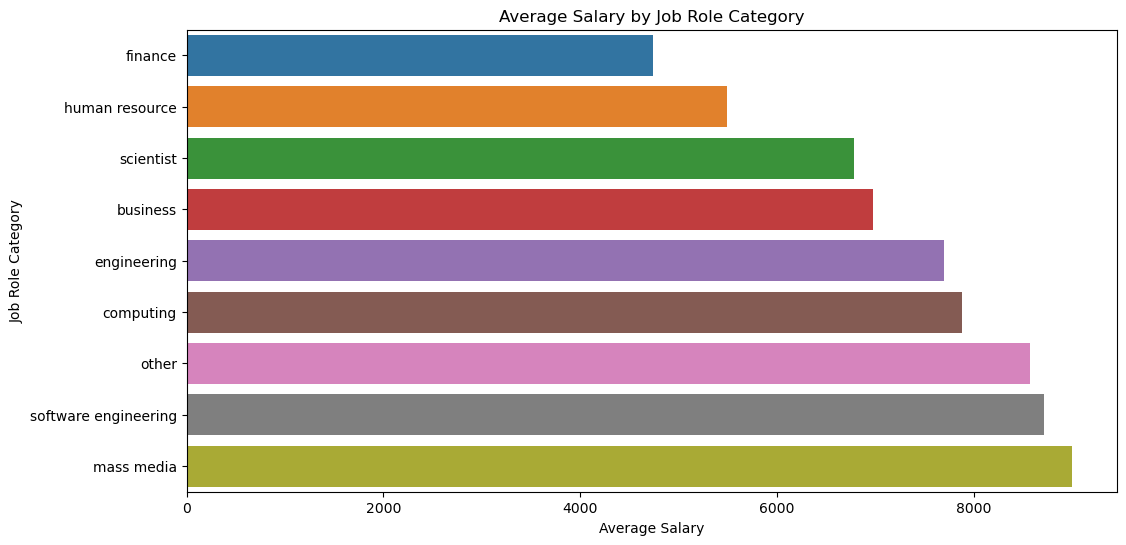

In [22]:
#Average Salary by Job Role Category
plt.figure(figsize=(12, 6))
avg_salary_by_category = data_cleaned.groupby('Industry')['Salary'].mean().sort_values()
sns.barplot(x=avg_salary_by_category, y=avg_salary_by_category.index)
plt.title('Average Salary by Job Role Category')
plt.xlabel('Average Salary')
plt.ylabel('Job Role Category')
plt.show()

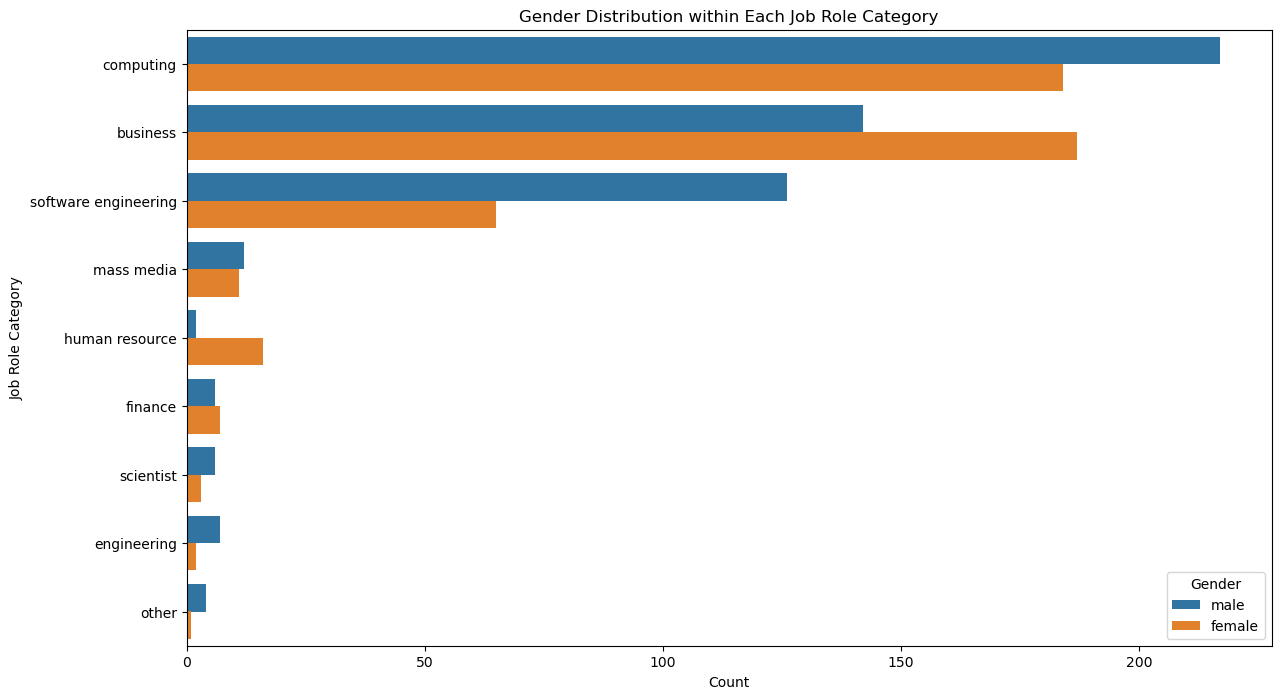

In [23]:
#Gender Distribution within Each Job Role Category

plt.figure(figsize=(14, 8))
sns.countplot(data=data_cleaned, y='Industry', hue='Gender', order=data_cleaned['Industry'].value_counts().index)
plt.title('Gender Distribution within Each Job Role Category')
plt.xlabel('Count')
plt.ylabel('Job Role Category')
plt.legend(title='Gender')
plt.show()

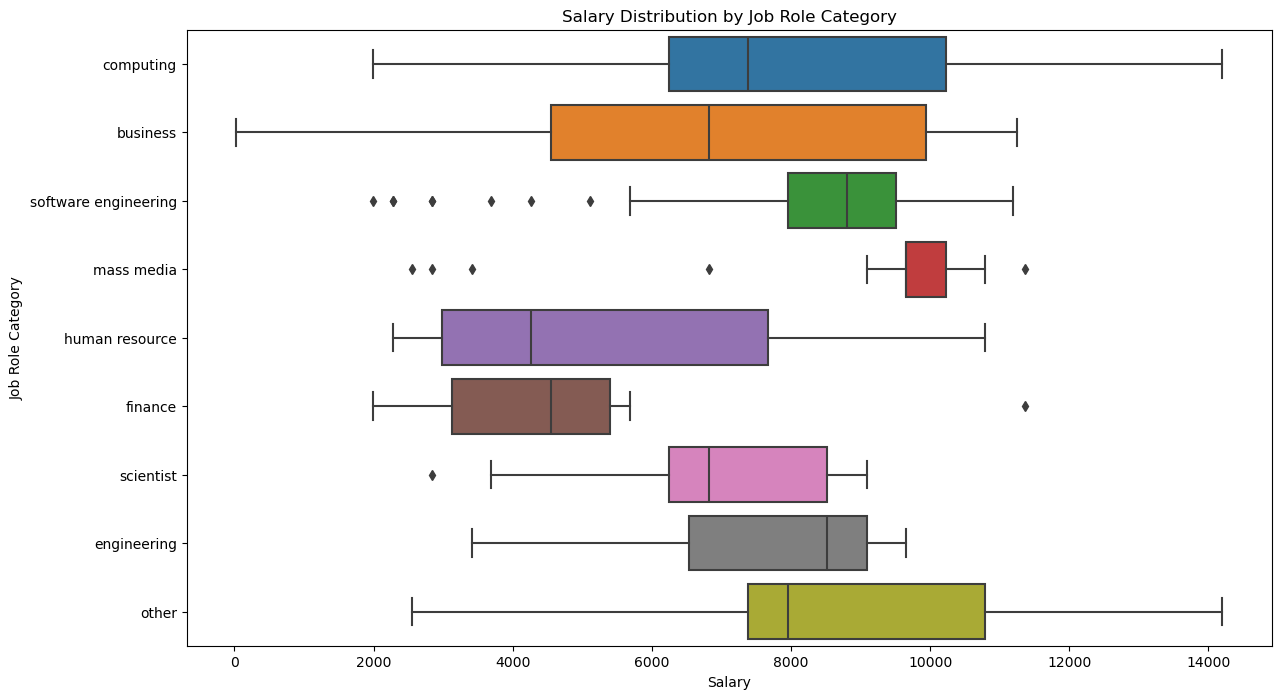

In [24]:
#Salary Distribution by Job Role Category

plt.figure(figsize=(14, 8))
sns.boxplot(data=data_cleaned, y='Industry', x='Salary', order=data_cleaned['Industry'].value_counts().index)
plt.title('Salary Distribution by Job Role Category')
plt.xlabel('Salary')
plt.ylabel('Job Role Category')
plt.show()

C:\Users\LQC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


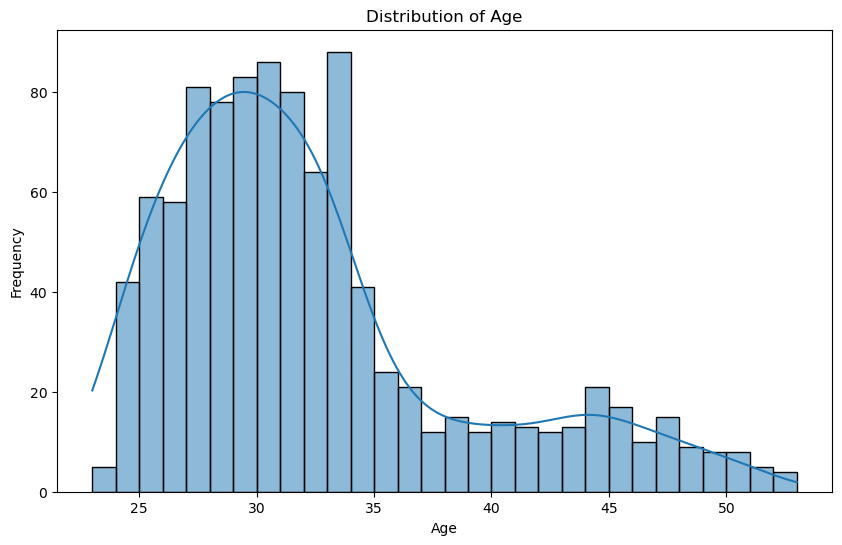

In [25]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\LQC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


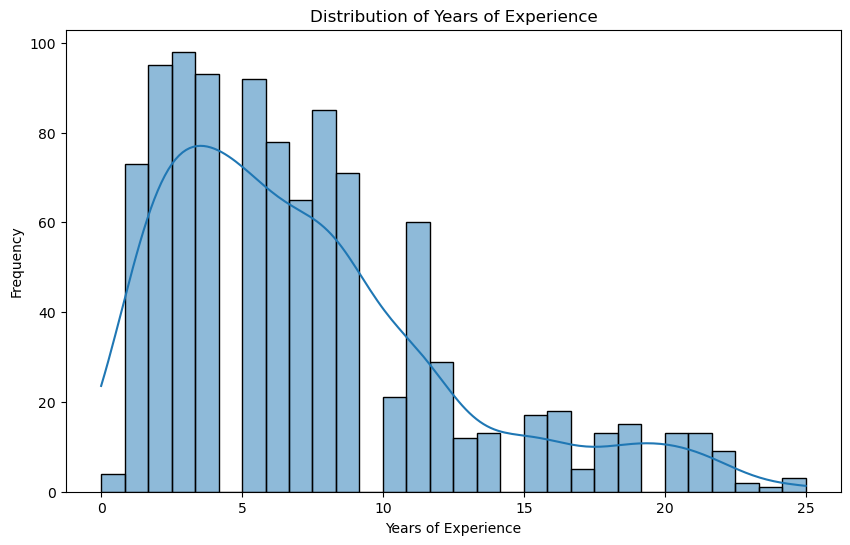

In [26]:
# Distribution of Years of Experience
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Years of Experience'], kde=True, bins=30)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()


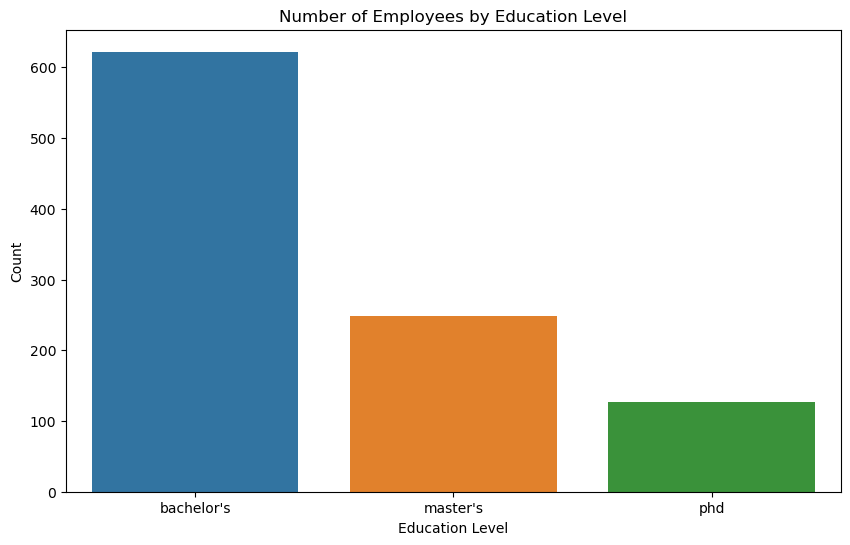

In [27]:
# Bar Plot for Education Level counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', data=data_cleaned, order=data_cleaned['Education Level'].value_counts().index)
plt.title('Number of Employees by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

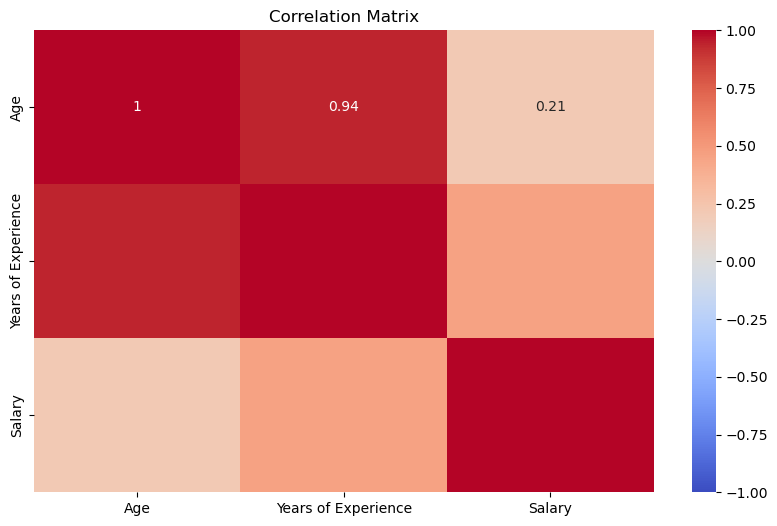

In [28]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = data_cleaned[['Age', 'Years of Experience', 'Salary']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

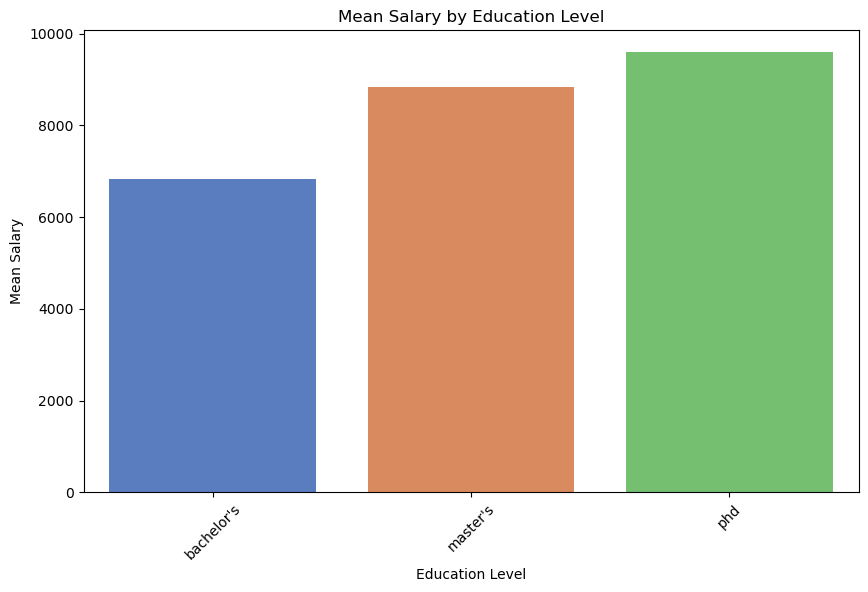

In [29]:
# Calculate mean salary by education level
mean_salary_education = data_cleaned.groupby('Education Level').Salary.mean().reset_index()

# Plotting the mean salary by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', data=mean_salary_education, palette='muted')

# Customize the plot
plt.title('Mean Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)
plt.show()

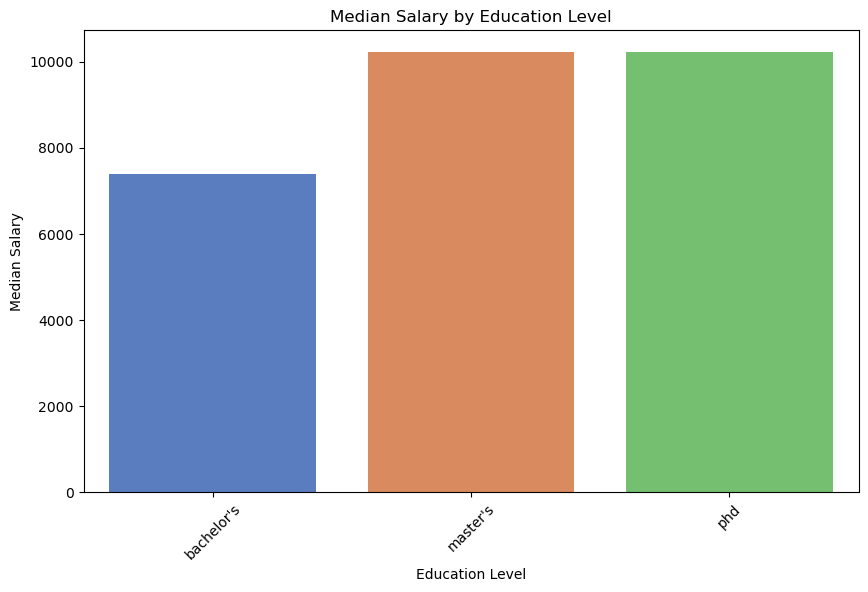

In [30]:
# Calculate median salary by education level
median_salary_education = data_cleaned.groupby('Education Level').Salary.median().reset_index()

# Plotting the mean salary by education level
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', data=median_salary_education, palette='muted')

# Customize the plot
plt.title('Median Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.show()

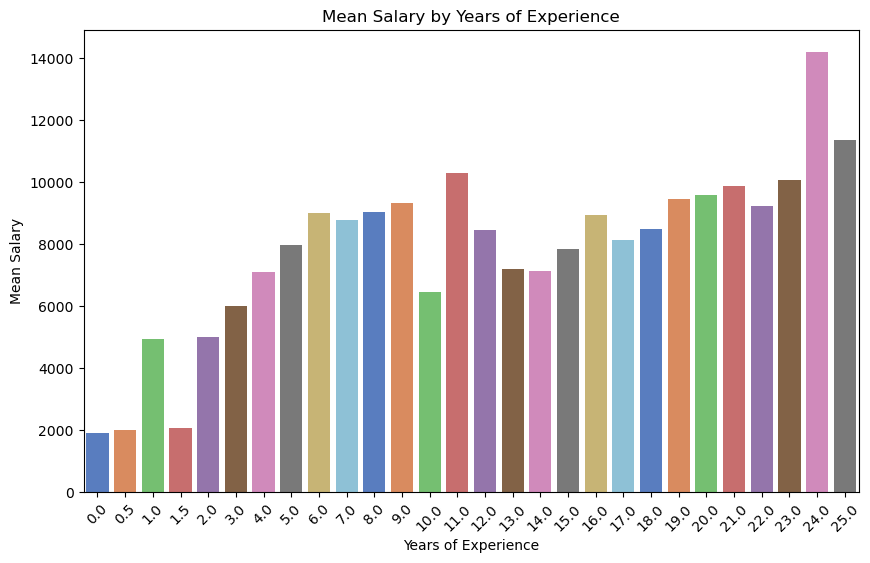

In [31]:
# Calculate mean salary by years of experience
mean_salary_experience = data_cleaned.groupby('Years of Experience').Salary.mean().reset_index()

# Plotting the mean salary by years of experience
plt.figure(figsize=(10, 6))
sns.barplot(x='Years of Experience', y='Salary', data=mean_salary_experience, palette='muted')

# Customize the plot
plt.title('Mean Salary by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)
plt.show()

In [32]:
print(data_cleaned)

      Age  Gender Education Level          Job Title              Industry  \
0    32.0    male      bachelor's  software engineer  software engineering   
1    28.0  female        master's       data analyst             computing   
2    45.0    male             phd     senior manager              business   
3    36.0  female      bachelor's    sales associate              business   
4    52.0    male        master's           director            mass media   
..    ...     ...             ...                ...                   ...   
995  32.0    male      bachelor's  software engineer  software engineering   
996  33.0  female        master's    product manager              business   
997  24.0    male      bachelor's       data analyst             computing   
998  27.0    male      bachelor's  software engineer  software engineering   
999  25.0  female      bachelor's       data analyst             computing   

     Years of Experience    Salary Category  
0                

In [33]:
X = data_cleaned[['Job Title', 'Years of Experience', 'Education Level', 'Gender']]
y = data_cleaned['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['Job Title', 'Education Level', 'Gender']
numerical_cols = ['Years of Experience']

# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Optional: Feature importance
importances = model.feature_importances_
feature_names = numerical_cols + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importance)

Mean Squared Error (MSE): 557542.41
R-squared (R²): 0.92
Years of Experience                   4.976877e-01
Job Title_data analyst                1.349651e-01
Job Title_product manager             9.783658e-02
Job Title_software engineer           9.305571e-02
Job Title_data scientist              6.675825e-02
                                          ...     
Job Title_junior designer             2.035169e-19
Job Title_customer success manager    1.904684e-19
Job Title_junior software engineer    1.451436e-19
Job Title_customer service rep        1.235637e-19
Job Title_junior hr coordinator       8.113896e-20
Length: 158, dtype: float64


In [34]:
# Example new data for prediction
new_data = pd.DataFrame({
    'Job Title': ['data analyst'],
    'Years of Experience': [3],
    'Education Level': ["master's "],
    'Gender': ['female']
})

# Make a prediction
predicted_salary = pipeline.predict(new_data)
print(f'Predicted Salary: {predicted_salary[0]}')

Predicted Salary: 5682.397822321423


In [35]:
from sklearn.linear_model import LinearRegression

X = data_cleaned[['Job Title', 'Years of Experience', 'Education Level', 'Gender']]
y = data_cleaned['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['Job Title', 'Education Level', 'Gender']
numerical_cols = ['Years of Experience']

# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Define the model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Optional: Coefficients
coefficients = model.coef_
feature_names = numerical_cols + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))
coefficients_df = pd.Series(coefficients, index=feature_names).sort_values(ascending=False)
print(coefficients_df)

Mean Squared Error (MSE): 777153.47
R-squared (R²): 0.89
Job Title_data scientist              6441.920346
Job Title_software engineer           5210.632067
Job Title_product manager             5113.429574
Job Title_data analyst                4369.795048
Job Title_chief data officer          4304.226865
                                         ...     
Job Title_sales operations manager   -3633.618626
Job Title_supply chain manager       -3917.569360
Job Title_supply chain analyst       -4411.344020
Job Title_operations analyst         -4601.311519
Job Title_office manager             -4715.778431
Length: 158, dtype: float64


In [36]:
# Example new data for prediction
new_data = pd.DataFrame({
    'Job Title': ['software engineer'],
    'Years of Experience': [5],
    'Education Level': ["bachelor's "],
    'Gender': ['male']
})

# Make a prediction
predicted_salary = pipeline.predict(new_data)
print(f'Predicted Salary: {predicted_salary[0]}')

Predicted Salary: 8376.377542125556


In [37]:
from xgboost import XGBRegressor

X = data_cleaned[['Job Title', 'Years of Experience', 'Education Level', 'Gender']]
y = data_cleaned['Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['Job Title', 'Education Level', 'Gender']
numerical_cols = ['Years of Experience']

# Preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = XGBRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Optional: Feature importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importance)

Mean Squared Error (MSE): 607943.74
R-squared (R²): 0.91
Job Title_data analyst                        0.224188
Job Title_software engineer                   0.171917
Job Title_product manager                     0.171551
Job Title_data scientist                      0.123170
Education Level_bachelor's                    0.107276
                                                ...   
Job Title_principal engineer                  0.000000
Job Title_operations manager                  0.000000
Job Title_director of business development    0.000000
Job Title_junior web designer                 0.000000
Gender_male                                   0.000000
Length: 158, dtype: float32


In [38]:
# Example new data for prediction
new_data = pd.DataFrame({
    'Job Title': ['data analyst'],
    'Years of Experience': [3],
    'Education Level': ["master's "],
    'Gender': ['female']
})

# Make a prediction
predicted_salary = pipeline.predict(new_data)
print(f'Predicted Salary: {predicted_salary[0]}')

Predicted Salary: 4560.6884765625


In [39]:
# Export the cleaned data to a new CSV file
data_cleaned.to_csv('cleaned_data.csv', index=False)

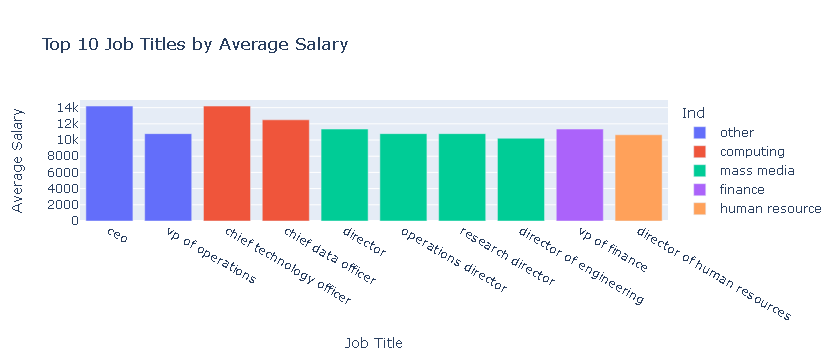

In [40]:
# Calculate the mean salary for each job title and job role category
mean_salary_by_title = data_cleaned.groupby(['Job Title', 'Industry'])['Salary'].mean().reset_index()

# Get the top 10 job titles based on mean salary
top_10_titles = mean_salary_by_title.nlargest(10, 'Salary')

# Create an interactive bar chart using Plotly
fig = px.bar(top_10_titles, x='Job Title', y='Salary', color='Industry',
             title='Top 10 Job Titles by Average Salary',
             labels={'Job Title': 'Job Title', 'Salary': 'Average Salary', 'Industry': 'Ind'},
             template='plotly')

# Customize the x-axis to show more tick values
fig.update_yaxes(tickvals=[i*2000 for i in range(0, 16)])  # Customize tick values (e.g., 0, 1000, 2000, ..., 14000)

# Show the plot
fig.show()

C:\Users\LQC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



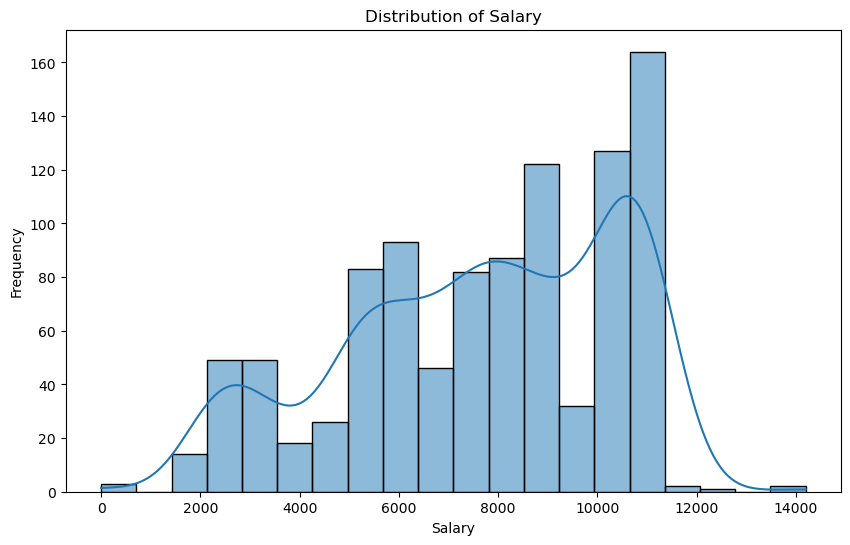

In [82]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a histogram of the Salary column
sns.histplot(data['Salary'], bins=20, kde=True)

# Add titles and labels
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Show the plot
plt.show()

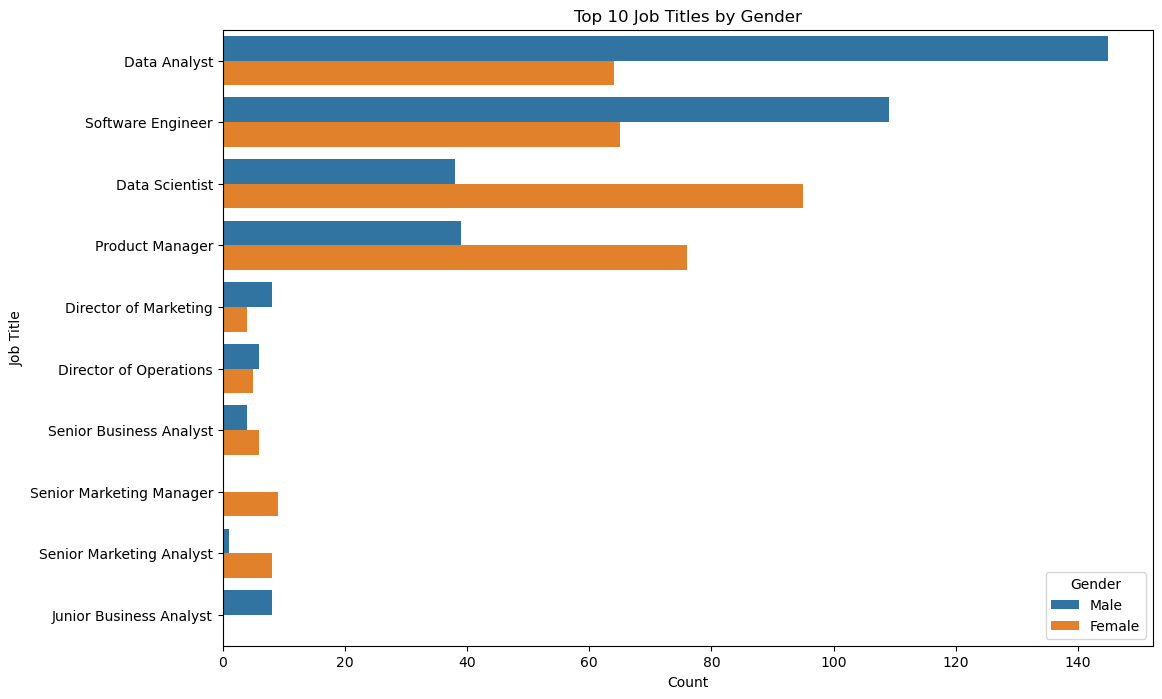

In [85]:
# Count the top 10 job titles
top_10_job_titles = data['Job Title'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 job titles
top_10_data = data[data['Job Title'].isin(top_10_job_titles)]

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot for top 10 job titles vs. gender
sns.countplot(data=top_10_data, y='Job Title', hue='Gender', order=top_10_job_titles)

# Add titles and labels
plt.title('Top 10 Job Titles by Gender')
plt.xlabel('Count')
plt.ylabel('Job Title')

# Show the plot
plt.show()

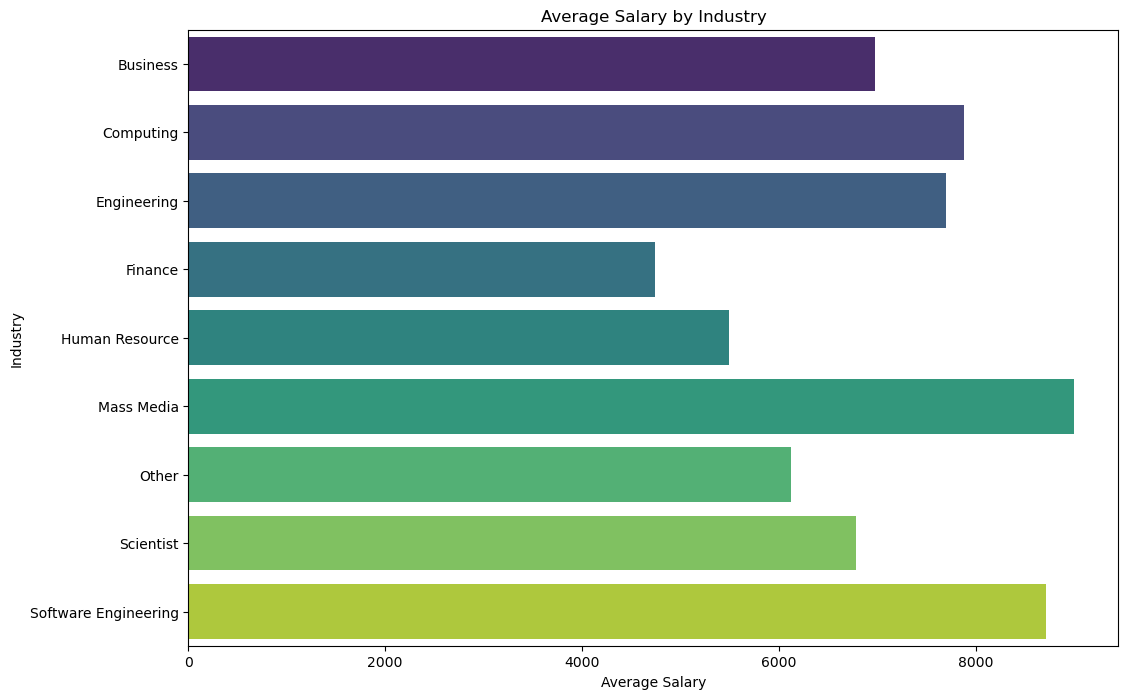

In [88]:
# Calculate the average salary by industry
average_salary_by_industry = data.groupby('Industry')['Salary'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a bar plot for average salary by industry
sns.barplot(x='Salary', y='Industry', data=average_salary_by_industry, palette='viridis')

# Add titles and labels
plt.title('Average Salary by Industry')
plt.xlabel('Average Salary')
plt.ylabel('Industry')

# Show the plot
plt.show()

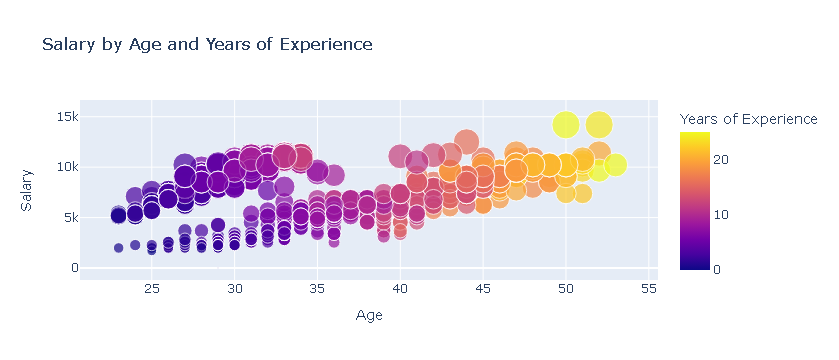

In [91]:

# Create the interactive scatter plot
fig = px.scatter(data, x='Age', y='Salary', color='Years of Experience',
                 size='Salary', hover_data=['Job Title', 'Industry'],
                 title='Salary by Age and Years of Experience',
                 labels={'Age': 'Age', 'Salary': 'Salary', 'Years of Experience': 'Years of Experience'})

# Show the plot
fig.show()

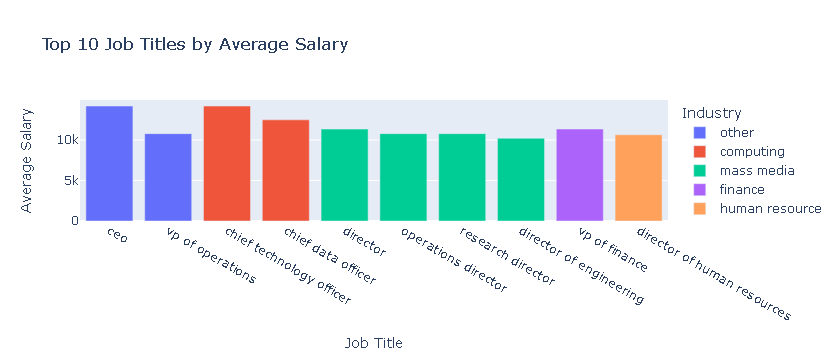

In [94]:
# Calculate the mean salary for each job title and job role category
mean_salary_by_title = data_cleaned.groupby(['Job Title', 'Industry'])['Salary'].mean().reset_index()

# Get the top 10 job titles based on mean salary
top_10_titles = mean_salary_by_title.nlargest(10, 'Salary')

# Create an interactive bar chart using Plotly
fig = px.bar(top_10_titles, x='Job Title', y='Salary', color='Industry',
             title='Top 10 Job Titles by Average Salary',
             labels={'Job Title': 'Job Title', 'Salary': 'Average Salary', 'Industry': 'Industry'},
             template='plotly')

# Show the plot
fig.show()

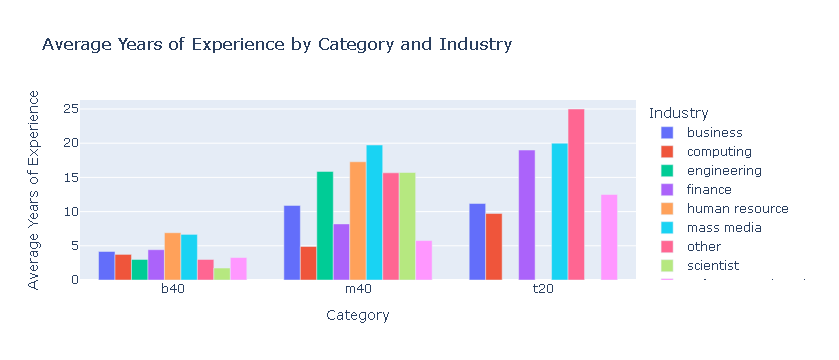

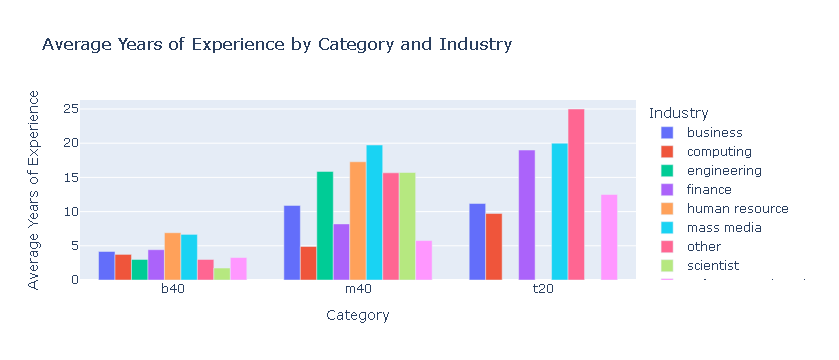

In [97]:
# Calculate the average years of experience for each job role category and industry
avg_experience_by_category_industry = data_cleaned.groupby(['Category', 'Industry'])['Years of Experience'].mean().reset_index()

# Create an interactive grouped bar chart using Plotly
fig = px.bar(avg_experience_by_category_industry, x='Category', y='Years of Experience', color='Industry',
             barmode='group',
             title='Average Years of Experience by Category and Industry',
             labels={'Category': 'Category', 'Years of Experience': 'Average Years of Experience', 'Industry': 'Industry'},
             template='plotly')

# Show the plot
fig.show()# Calculate the average years of experience for each job role category and industry
avg_experience_by_category_industry = data_cleaned.groupby(['Category', 'Industry'])['Years of Experience'].mean().reset_index()

# Create an interactive grouped bar chart using Plotly
fig = px.bar(avg_experience_by_category_industry, x='Category', y='Years of Experience', color='Industry',
             barmode='group',
             title='Average Years of Experience by Category and Industry',
             labels={'Category': 'Category', 'Years of Experience': 'Average Years of Experience', 'Industry': 'Industry'},
             template='plotly')

# Show the plot
fig.show()

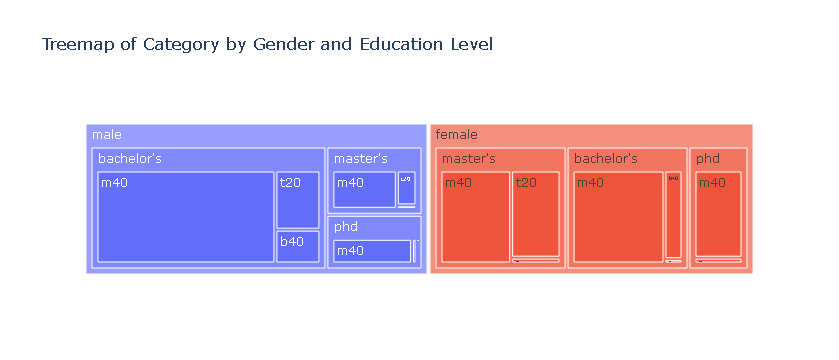

In [100]:
# Create an interactive treemap using Plotly
fig = px.treemap(data_cleaned, path=['Gender', 'Education Level', 'Category'], values='Salary',
                 title='Treemap of Category by Gender and Education Level',
                 labels={'Gender': 'Gender', 'Education Level': 'Education Level', 'Category': 'Category'},
                 template='plotly')

# Show the plot
fig.show()

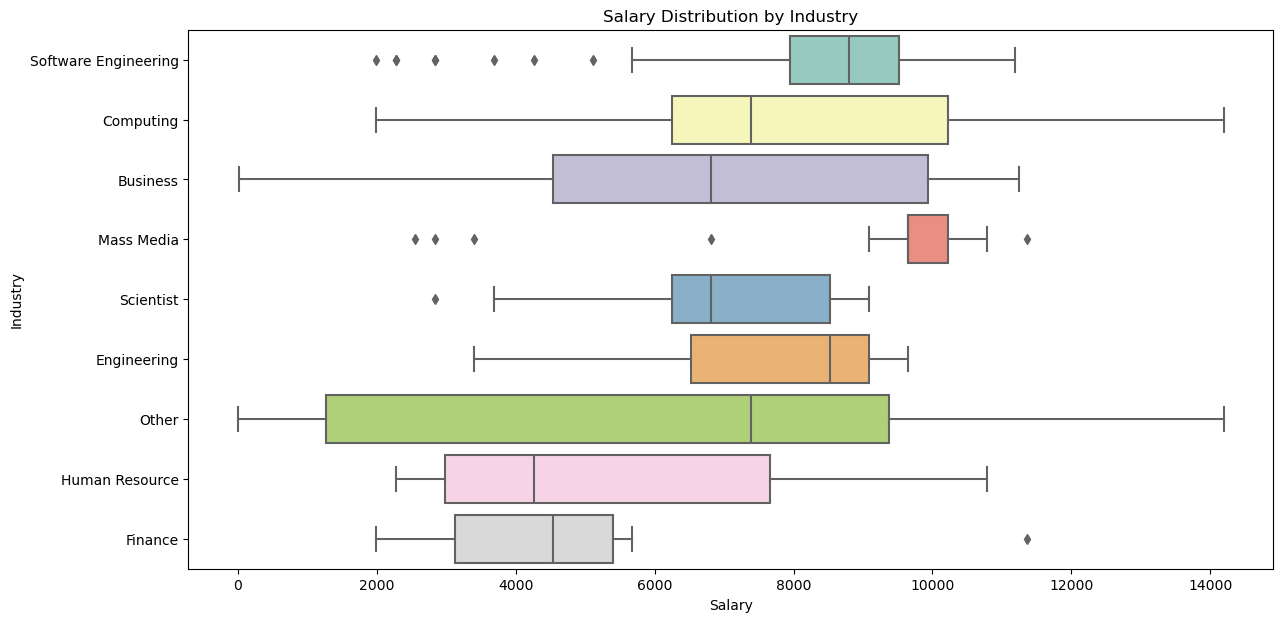

In [104]:
# Set the plot size
plt.figure(figsize=(14, 7))

# Create the box plot
sns.boxplot(x='Salary', y='Industry', data=data, palette='Set3')

# Add the title and labels
plt.title('Salary Distribution by Industry')
plt.xlabel('Salary')
plt.ylabel('Industry')

# Show the plot
plt.show()

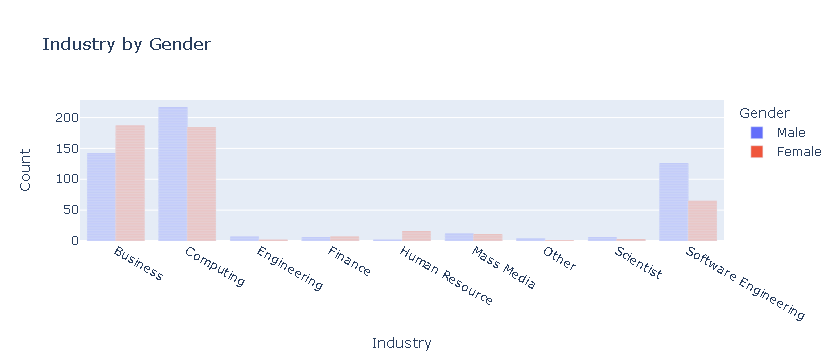

In [107]:
# Create the interactive bar plot
fig = px.bar(data, x='Industry', color='Gender', barmode='group',
             title='Industry by Gender', 
             labels={'Industry': 'Industry', 'Gender': 'Gender', 'count': 'Count'},
             category_orders={'Industry': sorted(data['Industry'].unique())})

# Show the plot
fig.show()

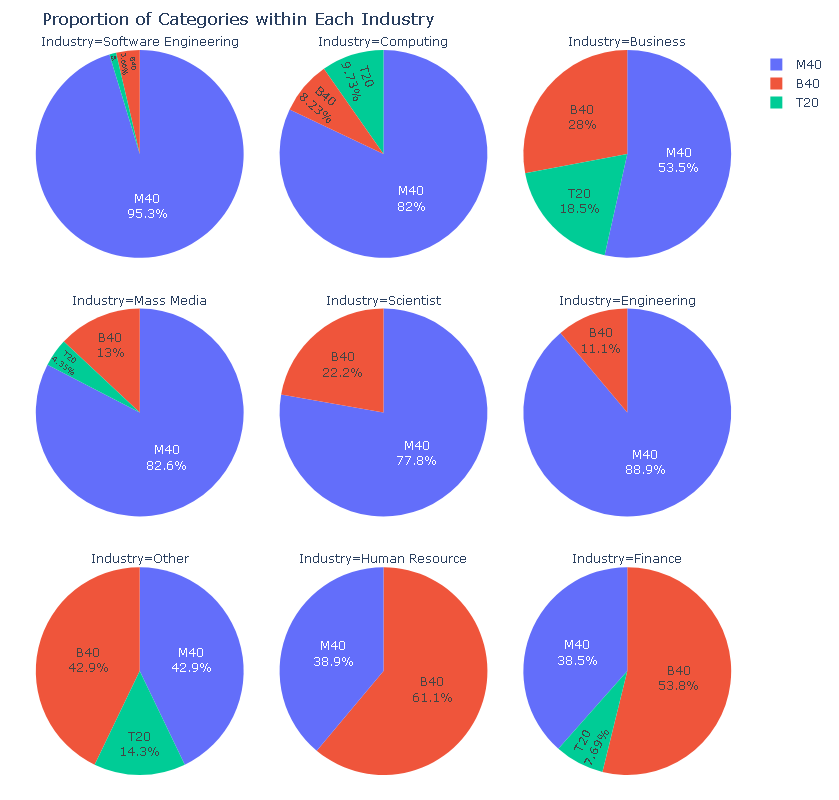

In [110]:
# Create faceted pie charts with facet_col_wrap to control layout
fig = px.pie(data, names='Category', facet_col='Industry', facet_col_wrap=3,  # Adjust the number to control columns
             title='Proportion of Categories within Each Industry',
             labels={'Category': 'Category', 'Industry': 'Industry'})

# Update layout to ensure title and facet titles are properly displayed
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), height=800)
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the plot
fig.show()

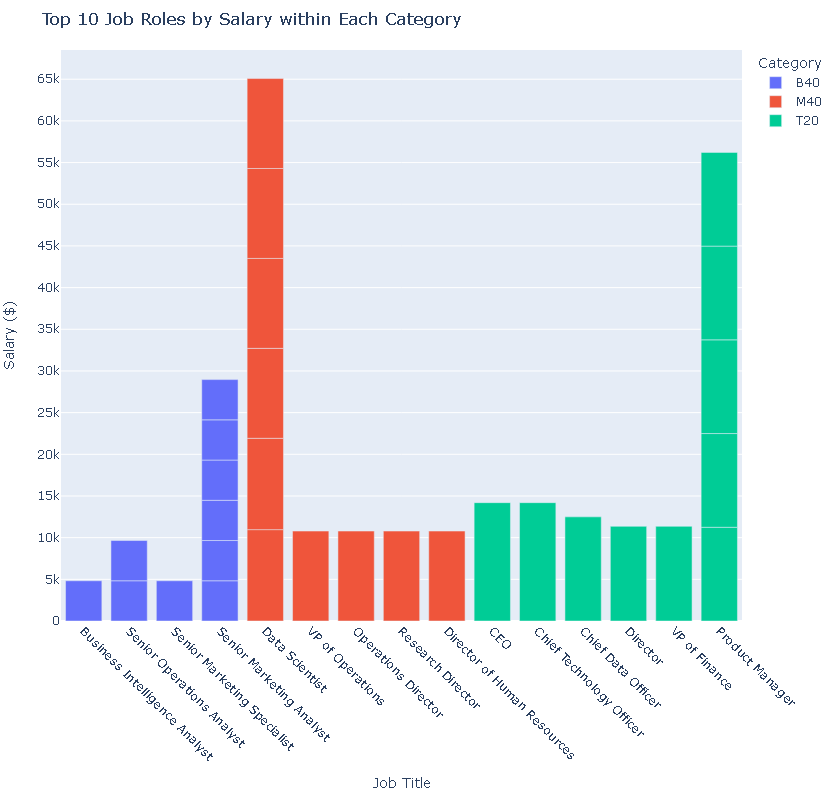

In [113]:
# Sort data by salary within each category
data_sorted = data.sort_values(['Category', 'Salary'], ascending=[True, False])

# Get top 10 job roles by salary within each category
top_10_jobs_by_category = data_sorted.groupby('Category').head(10)

# Create the bar plot
fig = px.bar(top_10_jobs_by_category, x='Job Title', y='Salary', color='Category',
             title='Top 10 Job Roles by Salary within Each Category',
             labels={'Job Title': 'Job Title', 'Salary': 'Salary ($)'},
             height=800)

# Update layout for better visualization
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tick0=0, dtick=5000)  # Adjusting y-axis increments by 5k

# Show the plot
fig.show()

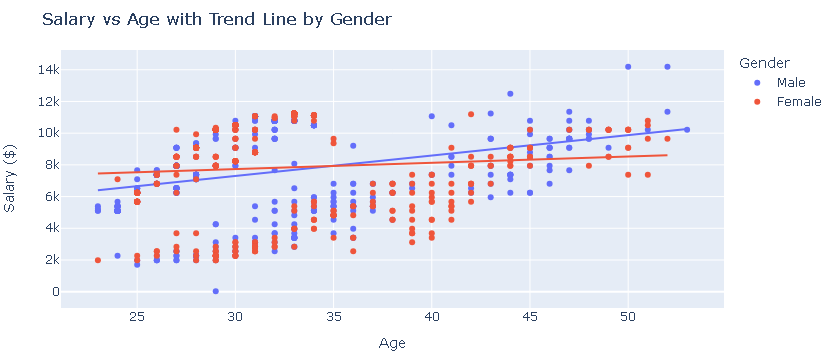

In [116]:
# Create the interactive scatter plot with trend lines
fig = px.scatter(data, x='Age', y='Salary', color='Gender', trendline='ols',
                 title='Salary vs Age with Trend Line by Gender',
                 labels={'Age': 'Age', 'Salary': 'Salary ($)', 'Gender': 'Gender'})

# Update layout for better visualization
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    yaxis=dict(tick0=0, dtick=2000)  # Adjusting y-axis increments by 2k
)

# Show the plot
fig.show()

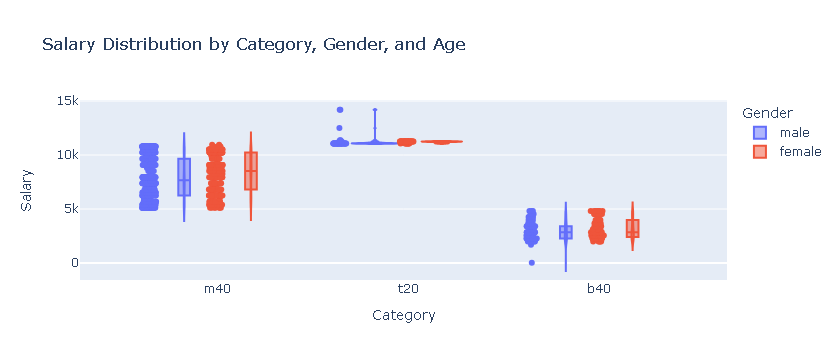

In [119]:
# Create an interactive violin plot using Plotly
fig = px.violin(data_cleaned, x='Category', y='Salary', color='Gender', box=True, points='all',
                title='Salary Distribution by Category, Gender, and Age',
                labels={'Category': 'Category', 'Salary': 'Salary', 'Gender': 'Gender'},
                template='plotly')

# Show the plot
fig.show()

  Category  Years of Experience  Gender
0      m40                  5.0    male
1      b40                  3.0  female
2      m40                 15.0    male
3      b40                  7.0  female
4      t20                 20.0    male


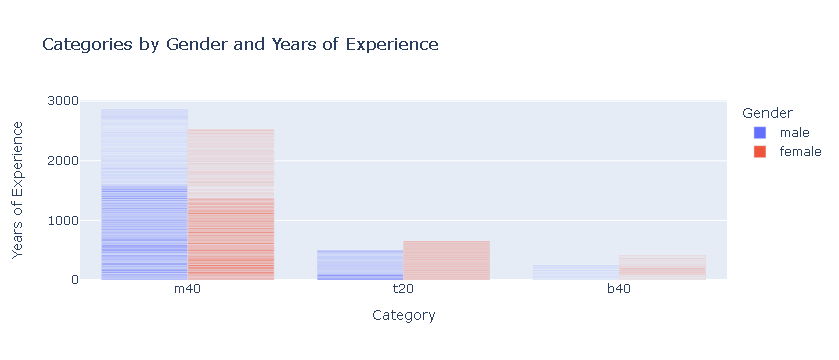

In [122]:
print(data_cleaned[['Category', 'Years of Experience', 'Gender']].head())

# Create an interactive grouped bar chart using Plotly
fig = px.bar(data_cleaned, x='Category', y='Years of Experience', color='Gender', barmode='group',
             title=' Categories by Gender and Years of Experience',
             labels={'Category': 'Category', 'Years of Experience': 'Years of Experience', 'Gender': 'Gender'},
             template='plotly')

# Show the plot
fig.show()

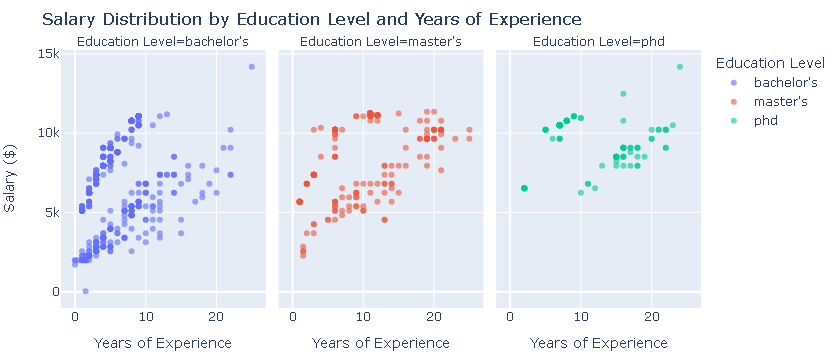

In [125]:
# Create an interactive scatter plot using Plotly with faceting
fig = px.scatter(data_cleaned, x='Years of Experience', y='Salary', color='Education Level',
                 title='Salary Distribution by Education Level and Years of Experience',
                 labels={'Years of Experience': 'Years of Experience', 'Salary': 'Salary ($)', 'Education Level': 'Education Level'},
                 template='plotly', facet_col='Education Level', opacity=0.6, size_max=10)

# Update layout for better visualization
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    xaxis=dict(title='Years of Experience'),
    yaxis=dict(title='Salary ($)')
)

# Show the plot
fig.show()

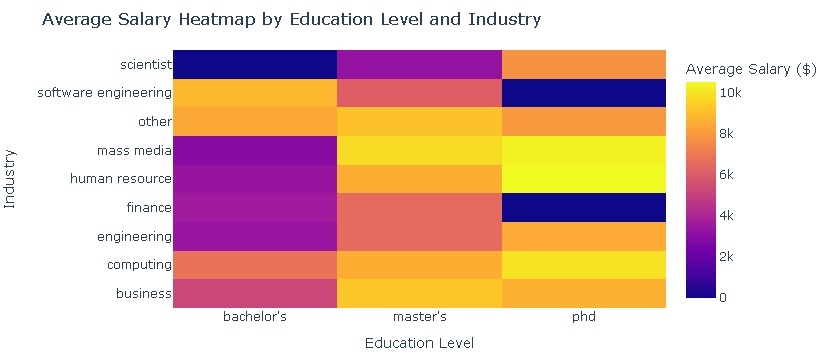

In [128]:
# Calculate average salary by Education Level and Industry
avg_salary = data_cleaned.groupby(['Education Level', 'Industry'])['Salary'].mean().reset_index()

# Create an interactive heatmap
fig = px.density_heatmap(avg_salary, x='Education Level', y='Industry', z='Salary',
                         title='Average Salary Heatmap by Education Level and Industry',
                         labels={'Education Level': 'Education Level', 'Industry': 'Industry', 'Salary': 'Average Salary ($)'})

# Update layout for better visualization
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    xaxis=dict(title='Education Level'),
    yaxis=dict(title='Industry'),
    coloraxis_colorbar=dict(title='Average Salary ($)')
)

# Show the plot
fig.show()

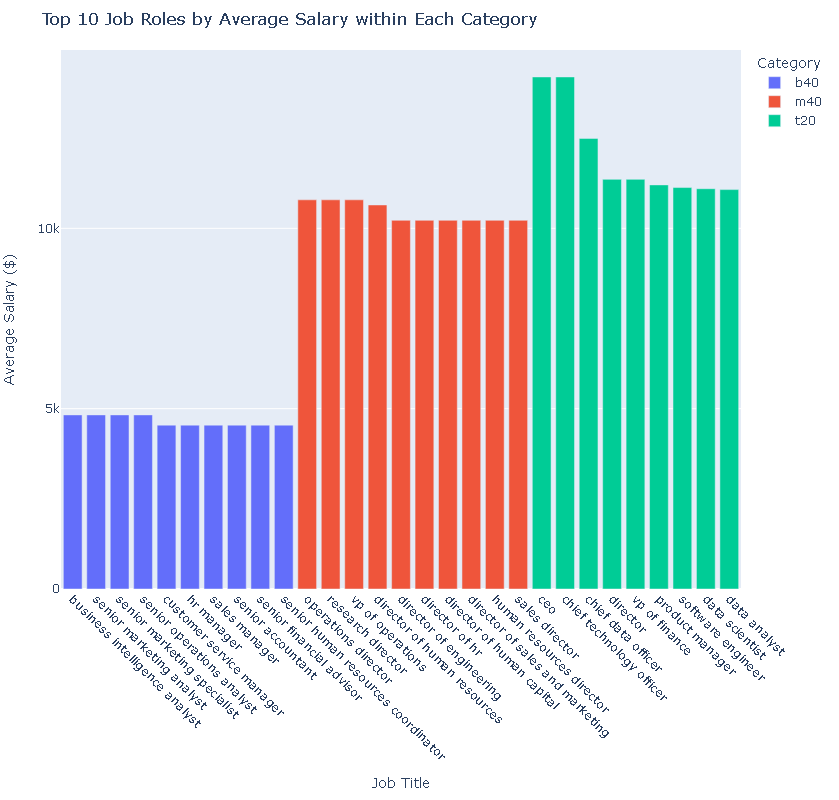

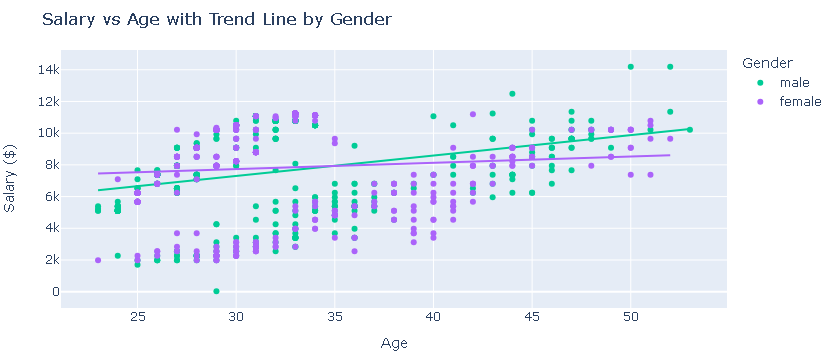

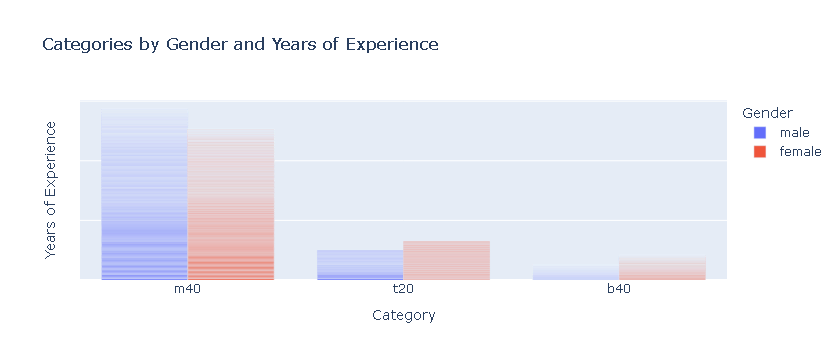

In [131]:
#For Top 10 Job Roles by Salary within Each Category (Graph 1)
# Calculate the average salary for each job title within each category
avg_salary_by_job = data_cleaned.groupby(['Category', 'Job Title'])['Salary'].mean().reset_index()

# Sort data by average salary within each category
avg_salary_by_job_sorted = avg_salary_by_job.sort_values(['Category', 'Salary'], ascending=[True, False])

# Get top 10 job roles by average salary within each category
top_10_avg_salary_by_category = avg_salary_by_job_sorted.groupby('Category').head(10)

# Create the bar plot
fig = px.bar(top_10_avg_salary_by_category, x='Job Title', y='Salary', color='Category',
             title='Top 10 Job Roles by Average Salary within Each Category',
             labels={'Job Title': 'Job Title', 'Salary': 'Average Salary ($)'},
             height=800)

# Update layout for better visualization
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    xaxis_title='Job Title',
    yaxis_title='Average Salary ($)',
    xaxis=dict(tickangle=45),
    yaxis=dict(tick0=0, dtick=5000)  # Adjusting y-axis increments by 5k
)

# Show the plot
fig.show()

#For Salary vs Age with Trend line by Gender (Graph 2)
# Create the interactive scatter plot with trend lines and custom colors
fig = px.scatter(data_cleaned, x='Age', y='Salary', color='Gender', trendline='ols',
                 title='Salary vs Age with Trend Line by Gender',
                 labels={'Age': 'Age', 'Salary': 'Salary ($)', 'Gender': 'Gender'},
                 color_discrete_map={'Female': 'darkpink', 'Male': 'blue'})

# Update layout for better visualization
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    yaxis=dict(tick0=0, dtick=2000)  # Adjusting y-axis increments by 2k
)

# Show the plot
fig.show()

#For Categories by Gender & Years of Exp (Graph 3)
# Sort the data by 'Years of Experience' in descending order
data_sorted = data_cleaned.sort_values(by='Years of Experience', ascending=False)

# Create an interactive grouped bar chart using Plotly
fig = px.bar(data_sorted, x='Category', y='Years of Experience', color='Gender', barmode='group',
             title='Categories by Gender and Years of Experience',
             labels={'Category': 'Category', 'Years of Experience': 'Years of Experience', 'Gender': 'Gender'},
             template='plotly')

# Customize the layout to remove y-axis numbers
fig.update_layout(
    yaxis=dict(
        showticklabels=False  # Hide the tick labels on the y-axis
    )
)

# Show the plot
fig.show()